## EDA 

1. We first have to load our dataset.


In [4]:
%pip install pandas

import pandas as pd

df = pd.read_csv("../raw_analyst_ratings.csv")  # replace with your actual filename
df.head()


Note: you may need to restart the kernel to use updated packages.


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [ ]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing headline or date
df.dropna(subset=['headline', 'date', 'url', 'publisher', 'stock'], inplace=True)


Dataset shape: (1407328, 9)

Missing values:
 Unnamed: 0               0
headline                 0
url                      0
publisher                0
date                     0
stock                    0
headline_length          0
day                      0
domain             1399240
dtype: int64


## 1. Descriptive Statstics

We analysed the length of each news headline to get a sense of variability in textual content. This is to infer how detail or succinct headlines tend to be.

In [ ]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

print(df['publisher'].value_counts().head(10))
print(df['date'].min(), df['date'].max())


NameError: name 'df' is not defined

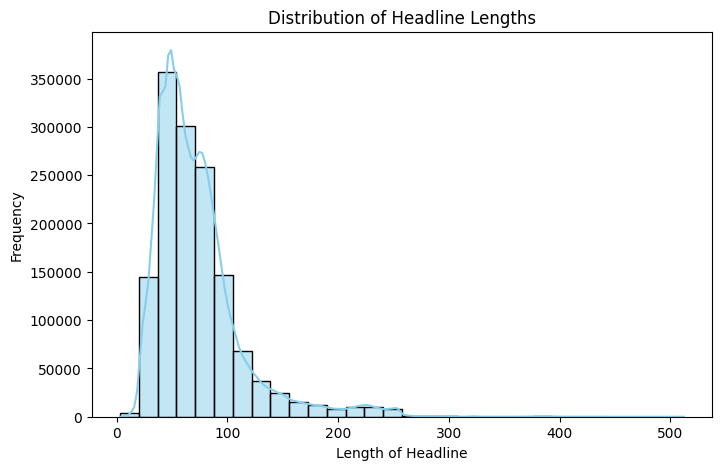

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


df['headline_length'] = df['headline'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()
